In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import librosa

# Read the Feather file
df = pd.read_feather('CRSP_daily_data_for_project(Technical_Analysis).feather')

In [3]:
from datetime import datetime
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d')

In [4]:
df.sort_values(by=['date','PERMNO'],inplace=True)

In [5]:
# df.reset_index(inplace=True)
df=df[df['date'].dt.year>=1998]
df

,PERMNO,date,Open,High,Low,Close,Volume,SHROUT,vwretx,ewretx,sprtrn
3395,10001,1998-01-02,9.12500,9.12500,9.00000,9.000,8925.0,2395.0,0.002468,0.010442,0.004750
11354,10002,1998-01-02,26.50000,26.50000,26.50000,26.500,200.0,4246.0,0.002468,0.010442,0.004750
27938,10009,1998-01-02,26.50000,26.50000,26.50000,26.500,1120.0,2389.0,0.002468,0.010442,0.004750
33513,10011,1998-01-02,11.62500,11.62500,11.62500,11.625,2733.0,7930.0,0.002468,0.010442,0.004750
36561,10012,1998-01-02,4.62500,4.87500,4.40625,4.625,300449.0,17501.0,0.002468,0.010442,0.004750
...,...,...,...,...,...,...,...,...,...,...,...
92907830,93423,2023-12-29,24.92000,25.25000,24.64440,25.080,1306363.0,83537.0,-0.004084,-0.007546,-0.002826
92918058,93426,2023-12-29,33.79000,34.50000,33.79000,34.070,94057.0,12510.0,-0.004084,-0.007546,-0.002826
92926793,93429,2023-12-29,177.85001,179.09000,177.44000,178.560,521913.0,105556.0,-0.004084,-0.007546,-0.002826
92933480,93434,2023-12-29,0.62000,0.71495,0.58500,0.700,169185.0,43039.0,-0.004084,-0.007546,-0.002826


In [6]:
df['DailyRet'] = df.groupby('PERMNO')['Close'].pct_change()
#df['MonthRet'] = df.groupby('PERMNO')['Close'].apply(lambda x: x.shift(-30).pct_change()).reset_index(level=0, drop=True)
df['MonthRet'] = df.groupby('PERMNO')['Close'].apply(lambda x: (x.shift(-30)-x)/x).reset_index(level=0, drop=True)
df

,PERMNO,date,Open,High,Low,Close,Volume,SHROUT,vwretx,ewretx,sprtrn,DailyRet,MonthRet
3395,10001,1998-01-02,9.12500,9.12500,9.00000,9.000,8925.0,2395.0,0.002468,0.010442,0.004750,NaN,-0.027778
11354,10002,1998-01-02,26.50000,26.50000,26.50000,26.500,200.0,4246.0,0.002468,0.010442,0.004750,NaN,0.009434
27938,10009,1998-01-02,26.50000,26.50000,26.50000,26.500,1120.0,2389.0,0.002468,0.010442,0.004750,NaN,-0.054245
33513,10011,1998-01-02,11.62500,11.62500,11.62500,11.625,2733.0,7930.0,0.002468,0.010442,0.004750,NaN,NaN
36561,10012,1998-01-02,4.62500,4.87500,4.40625,4.625,300449.0,17501.0,0.002468,0.010442,0.004750,NaN,-0.256757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92907830,93423,2023-12-29,24.92000,25.25000,24.64440,25.080,1306363.0,83537.0,-0.004084,-0.007546,-0.002826,0.004003,NaN
92918058,93426,2023-12-29,33.79000,34.50000,33.79000,34.070,94057.0,12510.0,-0.004084,-0.007546,-0.002826,0.013385,NaN
92926793,93429,2023-12-29,177.85001,179.09000,177.44000,178.560,521913.0,105556.0,-0.004084,-0.007546,-0.002826,0.004049,NaN
92933480,93434,2023-12-29,0.62000,0.71495,0.58500,0.700,169185.0,43039.0,-0.004084,-0.007546,-0.002826,0.166667,NaN


In [7]:
df = df[~df['DailyRet'].isna()]
df = df[~df['MonthRet'].isna()].reset_index(drop=True)
df

,PERMNO,date,Open,High,Low,Close,Volume,SHROUT,vwretx,ewretx,sprtrn,DailyRet,MonthRet
0,10001,1998-01-05,9.12500,9.12500,9.12500,9.125,1000.0,2395.0,0.002257,0.005564,0.002082,0.013889,-0.020548
1,10002,1998-01-05,24.00000,24.00000,24.00000,24.000,100.0,4246.0,0.002257,0.005564,0.002082,-0.094340,0.104167
2,10009,1998-01-05,26.50000,26.50000,26.50000,26.500,300.0,2389.0,0.002257,0.005564,0.002082,0.000000,-0.051887
3,10012,1998-01-05,4.75000,4.75000,4.21875,4.375,127796.0,17501.0,0.002257,0.005564,0.002082,-0.054054,-0.214286
4,10016,1998-01-05,13.37500,13.37500,13.12500,13.250,13460.0,13729.0,0.002257,0.005564,0.002082,0.000000,-0.037736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271285,93423,2023-11-15,24.74000,24.87000,23.72000,24.030,1441865.0,83520.0,0.001816,0.005472,0.001597,-0.027519,0.043695
29271286,93426,2023-11-15,29.84000,30.19000,29.63000,29.820,52595.0,12581.0,0.001816,0.005472,0.001597,0.006752,0.142522
29271287,93429,2023-11-15,177.39000,178.24001,176.57001,176.980,1031479.0,105517.0,0.001816,0.005472,0.001597,-0.002311,0.008928
29271288,93434,2023-11-15,0.66500,0.71000,0.65000,0.650,29579.0,43039.0,0.001816,0.005472,0.001597,0.000000,0.076923


In [8]:
def quintiles(inser):
    outser = pd.qcut(inser, q=5, labels=range(1,6))
    return outser

def deciles(inser):
    outser = pd.qcut(inser, q=10, labels=range(0,10))
    return outser

In [9]:
df

,PERMNO,date,Open,High,Low,Close,Volume,SHROUT,vwretx,ewretx,sprtrn,DailyRet,MonthRet
0,10001,1998-01-05,9.12500,9.12500,9.12500,9.125,1000.0,2395.0,0.002257,0.005564,0.002082,0.013889,-0.020548
1,10002,1998-01-05,24.00000,24.00000,24.00000,24.000,100.0,4246.0,0.002257,0.005564,0.002082,-0.094340,0.104167
2,10009,1998-01-05,26.50000,26.50000,26.50000,26.500,300.0,2389.0,0.002257,0.005564,0.002082,0.000000,-0.051887
3,10012,1998-01-05,4.75000,4.75000,4.21875,4.375,127796.0,17501.0,0.002257,0.005564,0.002082,-0.054054,-0.214286
4,10016,1998-01-05,13.37500,13.37500,13.12500,13.250,13460.0,13729.0,0.002257,0.005564,0.002082,0.000000,-0.037736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271285,93423,2023-11-15,24.74000,24.87000,23.72000,24.030,1441865.0,83520.0,0.001816,0.005472,0.001597,-0.027519,0.043695
29271286,93426,2023-11-15,29.84000,30.19000,29.63000,29.820,52595.0,12581.0,0.001816,0.005472,0.001597,0.006752,0.142522
29271287,93429,2023-11-15,177.39000,178.24001,176.57001,176.980,1031479.0,105517.0,0.001816,0.005472,0.001597,-0.002311,0.008928
29271288,93434,2023-11-15,0.66500,0.71000,0.65000,0.650,29579.0,43039.0,0.001816,0.005472,0.001597,0.000000,0.076923


In [21]:
df.set_index(['date'], inplace=True)

In [22]:
from tqdm import tqdm
df['Decile']=0
for i,r in tqdm(df.groupby('date')):
    r['Decile'] = deciles(r['MonthRet'])
    df.loc[df.index==i] = r

100%|██████████| 6510/6510 [04:21<00:00, 24.89it/s]


In [23]:
df

,PERMNO,Open,High,Low,Close,Volume,SHROUT,vwretx,ewretx,sprtrn,DailyRet,MonthRet,Decile
date,,,,,,,,,,,,,
1998-01-05,10001,9.12500,9.12500,9.12500,9.125,1000.0,2395.0,0.002257,0.005564,0.002082,0.013889,-0.020548,3
1998-01-05,10002,24.00000,24.00000,24.00000,24.000,100.0,4246.0,0.002257,0.005564,0.002082,-0.094340,0.104167,7
1998-01-05,10009,26.50000,26.50000,26.50000,26.500,300.0,2389.0,0.002257,0.005564,0.002082,0.000000,-0.051887,2
1998-01-05,10012,4.75000,4.75000,4.21875,4.375,127796.0,17501.0,0.002257,0.005564,0.002082,-0.054054,-0.214286,0
1998-01-05,10016,13.37500,13.37500,13.12500,13.250,13460.0,13729.0,0.002257,0.005564,0.002082,0.000000,-0.037736,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-15,93423,24.74000,24.87000,23.72000,24.030,1441865.0,83520.0,0.001816,0.005472,0.001597,-0.027519,0.043695,3
2023-11-15,93426,29.84000,30.19000,29.63000,29.820,52595.0,12581.0,0.001816,0.005472,0.001597,0.006752,0.142522,6
2023-11-15,93429,177.39000,178.24001,176.57001,176.980,1031479.0,105517.0,0.001816,0.005472,0.001597,-0.002311,0.008928,2


In [24]:
# df['Decile'] = df.groupby('date')['MonthRet'].apply(lambda x: pd.qcut(x, q=10, labels=range(1,11))).reset_index(level=0, drop=True)
df.reset_index(inplace=True)
df

,date,PERMNO,Open,High,Low,Close,Volume,SHROUT,vwretx,ewretx,sprtrn,DailyRet,MonthRet,Decile
0,1998-01-05,10001,9.12500,9.12500,9.12500,9.125,1000.0,2395.0,0.002257,0.005564,0.002082,0.013889,-0.020548,3
1,1998-01-05,10002,24.00000,24.00000,24.00000,24.000,100.0,4246.0,0.002257,0.005564,0.002082,-0.094340,0.104167,7
2,1998-01-05,10009,26.50000,26.50000,26.50000,26.500,300.0,2389.0,0.002257,0.005564,0.002082,0.000000,-0.051887,2
3,1998-01-05,10012,4.75000,4.75000,4.21875,4.375,127796.0,17501.0,0.002257,0.005564,0.002082,-0.054054,-0.214286,0
4,1998-01-05,10016,13.37500,13.37500,13.12500,13.250,13460.0,13729.0,0.002257,0.005564,0.002082,0.000000,-0.037736,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271285,2023-11-15,93423,24.74000,24.87000,23.72000,24.030,1441865.0,83520.0,0.001816,0.005472,0.001597,-0.027519,0.043695,3
29271286,2023-11-15,93426,29.84000,30.19000,29.63000,29.820,52595.0,12581.0,0.001816,0.005472,0.001597,0.006752,0.142522,6
29271287,2023-11-15,93429,177.39000,178.24001,176.57001,176.980,1031479.0,105517.0,0.001816,0.005472,0.001597,-0.002311,0.008928,2
29271288,2023-11-15,93434,0.66500,0.71000,0.65000,0.650,29579.0,43039.0,0.001816,0.005472,0.001597,0.000000,0.076923,4


In [25]:
df['PERMNO+Date'] = list(zip(df['PERMNO'], df['date'].dt.strftime('%Y-%m-%d')))
df

,date,PERMNO,Open,High,Low,Close,Volume,SHROUT,vwretx,ewretx,sprtrn,DailyRet,MonthRet,Decile,PERMNO+Date
0,1998-01-05,10001,9.12500,9.12500,9.12500,9.125,1000.0,2395.0,0.002257,0.005564,0.002082,0.013889,-0.020548,3,"(10001, 1998-01-05)"
1,1998-01-05,10002,24.00000,24.00000,24.00000,24.000,100.0,4246.0,0.002257,0.005564,0.002082,-0.094340,0.104167,7,"(10002, 1998-01-05)"
2,1998-01-05,10009,26.50000,26.50000,26.50000,26.500,300.0,2389.0,0.002257,0.005564,0.002082,0.000000,-0.051887,2,"(10009, 1998-01-05)"
3,1998-01-05,10012,4.75000,4.75000,4.21875,4.375,127796.0,17501.0,0.002257,0.005564,0.002082,-0.054054,-0.214286,0,"(10012, 1998-01-05)"
4,1998-01-05,10016,13.37500,13.37500,13.12500,13.250,13460.0,13729.0,0.002257,0.005564,0.002082,0.000000,-0.037736,3,"(10016, 1998-01-05)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271285,2023-11-15,93423,24.74000,24.87000,23.72000,24.030,1441865.0,83520.0,0.001816,0.005472,0.001597,-0.027519,0.043695,3,"(93423, 2023-11-15)"
29271286,2023-11-15,93426,29.84000,30.19000,29.63000,29.820,52595.0,12581.0,0.001816,0.005472,0.001597,0.006752,0.142522,6,"(93426, 2023-11-15)"
29271287,2023-11-15,93429,177.39000,178.24001,176.57001,176.980,1031479.0,105517.0,0.001816,0.005472,0.001597,-0.002311,0.008928,2,"(93429, 2023-11-15)"
29271288,2023-11-15,93434,0.66500,0.71000,0.65000,0.650,29579.0,43039.0,0.001816,0.005472,0.001597,0.000000,0.076923,4,"(93434, 2023-11-15)"


In [26]:
df['data_cumcount'] = df.groupby('PERMNO').cumcount()


In [27]:
look_back_period = 30
# begin_date = '1999-01-01'
# end_date = '2000-12-31'
# train_test_split_date = '2000-01-01'
# # date = df.index.get_level_values('date')
# df_temp = df[(df['date']>begin_date)&(df['date']<=end_date)].copy()
# # del date
# # We only want data point with enough lag information
# df_temp = df_temp[df_temp['data_cumcount'] > look_back_period]
# # eliminate meanless data points from padding value
# df_temp = df_temp[df_temp['MonthRet'] != 0]
# df_temp = df_temp.reset_index()

# # Generate Pair_PERMNO_date for future indexing
# # df_temp['Pair_PERMNO_date'] = list(zip(df_temp['PERMNO'], df_temp['date']))
# # take the last day in the month as sample
# df_temp['date'] = pd.to_datetime(df_temp['date']).dt.to_period('M').astype(str)
# df_temp = df_temp.groupby(['PERMNO','date']).tail(1)

# # reset index to make it more convenient for future use
# df_temp = df_temp.reset_index()

In [28]:
# df_temp

In [29]:
# train_test_split_date

In [30]:
# df_train = df_temp[df_temp['date']<train_test_split_date]
# df_test = df_temp[df_temp['date']>=train_test_split_date]

In [31]:
# label_name = 'Decile'
# X_train = df_train.drop(label_name, axis=1)
# X_test = df_test.drop(label_name, axis=1)

# y_train = df_train[label_name]
# y_test = df_test[label_name]

In [32]:
# Function: Generate CQT data for each stock
def create_cqt_df(stock_df, n_bins=20):
    stock_returns = stock_df['DailyRet'].values

    # Data preprocessing: Ensure all values are finite
    stock_returns = np.nan_to_num(stock_returns, nan=0.0, posinf=0.0, neginf=0.0)

    sr = 1
    fmin = 0.01  # Minimum frequency
    hop_length = 1
    cqt_result = librosa.cqt(stock_returns, n_bins=n_bins, sr=sr, hop_length=hop_length, fmin=fmin)
    cqt_result_db = librosa.amplitude_to_db(np.abs(cqt_result), ref=np.mean)

    cqt_df = pd.DataFrame(cqt_result_db.T, columns=[f'CQT_{i+1}' for i in range(cqt_result_db.shape[0])])
    cqt_df = cqt_df.loc[:len(stock_df)-1, :]  # Ensure the length matches the original data
    # cqt = pd.concat([stock_df['date'], cqt_df], axis=1)
    # cqt = pd.concat([stock_df.index.get_level_values(1), cqt_df], axis=1)
    cqt_df.set_index(stock_df.index.get_level_values(1).to_flat_index(), inplace=True)
    return cqt_df

# Function: Create rolling windows and retain date indices
def create_rolling_windows_with_dates(data, cqt_window_size, date_to_index):
    windows = []
    date_indices = []
    for i in range(len(data) - cqt_window_size + 1):
        window = data.iloc[i:i + cqt_window_size, 1:].values  # Exclude the date column, keep only CQT data
        windows.append(window)
        start_date = data.iloc[i]['date']
        if start_date in date_to_index:
            date_indices.append(date_to_index[start_date])
    return np.array(windows), date_indices


In [33]:
df.set_index(['PERMNO', 'date'], inplace=True)

In [34]:
df.sort_index(inplace=True)

In [35]:
df

Open       High        Low      Close       Volume  \
PERMNO date                                                                  
10001  1998-01-05    9.12500    9.12500    9.12500    9.12500       1000.0   
       1998-01-06    9.12500    9.12500    9.12500    9.12500        300.0   
       1998-01-07    9.00000    9.12500    9.00000    9.12500       2264.0   
       1998-01-08    9.00000    9.12500    9.00000    9.12500        543.0   
       1998-01-09        NaN    9.12500    9.00000    9.06250          0.0   
...                      ...        ...        ...        ...          ...   
93436  2023-11-09  219.75000  220.80000  206.67999  209.98000  141370646.0   
       2023-11-10  210.03000  215.38000  205.69000  214.64999  130818519.0   
       2023-11-13  215.60001  225.39999  211.61011  223.71001  139344959.0   
       2023-11-14  235.03000  238.13499  230.72000  237.41000  149128332.0   
       2023-11-15  239.28999  246.70000  236.45000  242.84000  149733647.0   

                      SHROUT    vwretx    ewretx    sprtrn  DailyRet  \
PERMNO date                                                            
10001  1998-01-05     2395.0  0.002257  0.005564  0.002082  0.013889   
       1998-01-06     2395.0 -0.010273 -0.003533 -0.010736  0.000000   
       1998-01-07     2395.0 -0.003710 -0.003572 -0.002669  0.000000   
       1998-01-08     2395.0 -0.008369 -0.003067 -0.008257  0.000000   
       1998-01-09     2395.0 -0.029338 -0.020644 -0.029654 -0.006849   
...                      ...       ...       ...       ...       ...   
93436  2023-11-09  3178921.0 -0.008586 -0.014880 -0.008084 -0.054613   
       2023-11-10  3178921.0  0.013823  0.004011  0.015616  0.022240   
       2023-11-13  3178921.0 -0.000386  0.000257 -0.000836  0.042208   
       2023-11-14  3178921.0  0.022639  0.030881  0.019075  0.061240   
       2023-11-15  3178921.0  0.001816  0.005472  0.001597  0.022872   

                   MonthRet  Decile          PERMNO+Date  data_cumcount  
PERMNO date                                                              
10001  1998-01-05 -0.020548       3  (10001, 1998-01-05)              0  
       1998-01-06 -0.020548       3  (10001, 1998-01-06)              1  
       1998-01-07 -0.020548       3  (10001, 1998-01-07)              2  
       1998-01-08 -0.020548       3  (10001, 1998-01-08)              3  
       1998-01-09 -0.024138       2  (10001, 1998-01-09)              4  
...                     ...     ...                  ...            ...  
93436  2023-11-09  0.202686       6  (93436, 2023-11-09)           3364  
       2023-11-10  0.195481       5  (93436, 2023-11-10)           3365  
       2023-11-13  0.168656       5  (93436, 2023-11-13)           3366  
       2023-11-14  0.066425       3  (93436, 2023-11-14)           3367  
       2023-11-15  0.023225       2  (93436, 2023-11-15)           3368  

[29271290 rows x 14 columns]

In [36]:
df.isna().sum()

Open             1046800
High                   0
Low                    0
Close                  0
Volume                33
SHROUT                 0
vwretx                 0
ewretx                 0
sprtrn                 0
DailyRet               0
MonthRet               0
Decile                 0
PERMNO+Date            0
data_cumcount          0
dtype: int64

In [37]:
# df.index.get_loc(df_temp['PERMNO+Date'][0])

In [38]:
# F.one_hot(torch.tensor(df.iloc[270]['Decile'].tolist(), dtype=torch.int64), 10)

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

class TimeSeriesDataset(Dataset):
    def __init__(self, whole_data, X, y=None, df_temp=None):
        self.whole_data = whole_data
        self.df_temp = df_temp
        self.X = X #torch.tensor(X, dtype=torch.float32)
        self.y = y if y is not None else None #torch.tensor(y, dtype=torch.float32) if y is not None else None

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):

        if self.y is not None:
          x = []
          y = []

          permo_date_locator = df.index.get_loc(self.df_temp['PERMNO+Date'][idx])

          #get x given index
          x_temp=create_cqt_df(df.iloc[permo_date_locator-look_back_period+1:permo_date_locator+1]).to_numpy()
          x.append(x_temp)
          # print(df.iloc[permo_date_locator]['Decile'].unique())
          #get y given index
          y_temp = F.one_hot(
             torch.tensor(
                df.iloc[permo_date_locator]['Decile'].tolist(), 
                dtype=torch.int64
              ), 
              10
          )
          y.append(y_temp)

          x = torch.tensor(x_temp, dtype=torch.float32)
          y = torch.tensor(y_temp, dtype=torch.float32)
          return x, y

        else:
          x = []
          i = idx
          permo_date_locator = df.index.get_loc(self.df_temp['PERMNO+Date'][idx])
          #get x given index
          x_temp  = create_cqt_df(df.iloc[permo_date_locator-look_back_period+1:permo_date_locator+1]).to_numpy()
          x.append(x_temp)

          x = torch.tensor(x_temp, dtype=torch.float32)

          return x

        '''
    def get_time_series_sample(self, x):
        return x
        '''

In [40]:
# df['Decile'].unique()

In [41]:
# # Create dataset
# dataset = TimeSeriesDataset(df, X_train, y_train, df_temp)

# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [42]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
seed = 42

In [43]:
device

device(type='mps')

In [71]:
import torch.nn as nn


class CNN_FCN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN_FCN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(30, 20), stride=1, padding=1)
        # self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0)
        
        # Fully Connected layers
        self.fc1 = nn.Linear(32, 128)  # 64 channels, 7x5 feature maps after pooling
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        # Add a channel dimension (batch_size, 1, 30, 20)
        x = x.unsqueeze(1)
        
        # Convolutional layers with ReLU and pooling
        x = self.pool(F.tanh(self.conv1(x)))  # (batch_size, 32, 15, 10)
        # x = self.pool(F.relu(self.conv2(x)))  # (batch_size, 64, 7, 5)
        
        # Flatten the tensor
        x = x.view(x.size(0), -1)  # (batch_size, 64*7*5)

        # Fully Connected layers with ReLU
        x = F.relu(self.fc1(x))  # (batch_size, 128)
        x = self.fc2(x)  # (batch_size, num_classes)
        # x = F.softmax(x, dim=1) # (batch_size, num_classes)

        return x
    

# model = CNN_FCN(num_classes=10).to(device)


In [45]:
import torch.optim as optim

# # Hyperparameters
# num_epochs = 2
# learning_rate = 0.01

# # Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # Training loop
# for epoch in range(num_epochs):
#     for i, (inputs, targets) in enumerate(dataloader):
#         inputs = inputs.to(device)  # Add feature dimension and move to device
#         targets = targets.to(device)  # Add feature dimension and move to device

#         outputs = model(inputs)
#         loss = criterion(outputs, targets)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         if (i+1) % 100 == 0:
#             print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], Loss: {loss.item():.4f}')

# print('Training finished.')


In [46]:
# # Create dataset
# test_dataset = TimeSeriesDataset(df, X_test, y_test, df_temp)

# # Create DataLoader
# test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [47]:
# torch.save(model, f'models/cnn_model_{datetime.strptime(begin_date, "%Y-%m-%d").strftime("%Y%m%d")}.pth')

In [48]:
# model.eval()
# running_loss = 0.0
# predictions = []
# for _, batch in enumerate(test_dataloader):
#     x_batch, y_batch = batch[0].to(device), batch[1].to(device)
#     with torch.no_grad():
#         y_pred = model(x_batch)
#         # _, predicted_indices = torch.max(y_pred, 1)
        
#         predictions.append(y_pred.cpu().numpy())
        
#         loss = criterion(y_pred, y_batch)
#         running_loss += loss.item()
#     print(f'Loss: {loss.item()}')
#     break
# print(f'Average Loss: {running_loss/len(test_dataloader)}')

In [49]:
# predictions

In [50]:
# predictions = [i.reshape(-1).tolist() for i in predictions]
# # Assuming nested_list is your nested list
# predictions = np.array([item for sublist in predictions for item in sublist])
# X_test['PredictedDecile'] = predictions
# X_test

In [51]:
# X_test['PredictedDecile'].unique()

In [52]:
# X_test.set_index(['PERMNO', 'date'], inplace=True)

In [53]:
# X_test.sort_index(inplace=True)

In [54]:
# X_test

In [55]:
# X_test.reset_index(inplace=True)

In [56]:
# predictions

In [57]:
# X_test[['PERMNO', 'date', 'PredictedDecile', 'DailyRet', 'Decile', 'MonthRet']].to_csv(f'predictions/lstm_predictions_{datetime.strptime(begin_date, "%Y-%m-%d").strftime("%Y%m%d")}.csv')

In [82]:
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import YearEnd

def train_model_annually(start_date, end_date):
    # models = []
    # iterate between start_date and end_date with 1 year step size
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")

    # while start_date < end_date:
    next_year = start_date + relativedelta(years=1) + YearEnd()
    
    # if next_year > end_date:
    #     next_year = end_date
        # break
    
    train_test_split_date = start_date + relativedelta(years=1)

    # print(start_date, next_year, train_test_split_date)
    df.reset_index(inplace=True)

    df_temp = df[(df['date']>=start_date)&(df['date']<=next_year)].copy()
    df_temp = df_temp[df_temp['MonthRet'] != 0]
    df_temp = df_temp.reset_index()
    df_temp['date'] = pd.to_datetime(df_temp['date']).dt.to_period('M').astype(str)
    df_temp = df_temp.groupby(['PERMNO','date']).tail(1)

    df.set_index(['PERMNO', 'date'], inplace=True)
    df.sort_index(inplace=True)
    
    df_temp.reset_index(inplace=True)

    df_train = df_temp[df_temp['date']<train_test_split_date.strftime('%Y-%m-%d')]
    df_test = df_temp[df_temp['date']>=train_test_split_date.strftime('%Y-%m-%d')]
    
    label_name = 'Decile'
    X_train = df_train.drop(label_name, axis=1)
    X_test = df_test.drop(label_name, axis=1)

    y_train = df_train[label_name]
    y_test = df_test[label_name]

    # Create dataset
    dataset = TimeSeriesDataset(df, X_train, y_train, df_temp)

    # Create DataLoader
    dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

    
    model = CNN_FCN(num_classes=10).to(device)

    num_epochs = 1
    learning_rate = 0.01

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loss = []
    # Training loop
    for epoch in range(num_epochs):
        for i, (inputs, targets) in enumerate(dataloader):
            inputs = inputs.to(device)  
            targets = targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # break
            
            if (i+1) % 100 == 0:
                # with open(f'logs/cnn_{start_date.strftime("%Y%m%d")}.log', 'a') as f:
                #     f.write(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], Loss: {loss.item():.4f}\n' )
                #     f.write(f'{outputs}\n')
                train_loss.append(loss.item())
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], Loss: {loss.item():.4f}')
        # break
    print('Training finished.')

    test_dataset = TimeSeriesDataset(df, X_test, y_test, df_temp)
    test_dataloader = DataLoader(test_dataset, batch_size=16)

    torch.save(model, f'models/cnn_model_{start_date.strftime("%Y%m%d")}.pth')

    model.eval()
    running_loss = 0.0
    predictions = []
    for _, batch in enumerate(test_dataloader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        with torch.no_grad():
            y_pred = model(x_batch)
            _, predicted_indices = torch.max(y_pred, 1)

            predictions.append(predicted_indices.cpu().numpy())
            
            loss = criterion(y_pred, y_batch)
            running_loss += loss.item()
        print(f'Loss: {loss.item()}')
        # break
    print(f'Average Loss: {running_loss/len(test_dataloader)}')

    predictions = [i.reshape(-1).tolist() for i in predictions]
    # Assuming nested_list is your nested list
    predictions = np.array([item for sublist in predictions for item in sublist])

    # try:
    X_test['PredictedDecile'] = predictions
    # X_test['PredictedDecile'] = 0
    X_test['Decile'] = y_test

    X_test.set_index(['PERMNO', 'date'], inplace=True)
    X_test.sort_index(inplace=True)
    X_test.reset_index(inplace=True)
    
    X_test[['PERMNO', 'date', 'PredictedDecile', 'DailyRet', 'Decile', 'MonthRet']].to_csv(f'predictions/cnn_predictions_{start_date.strftime("%Y%m%d")}.csv')

    start_date = train_test_split_date
        # break
    return train_loss



In [59]:
# df.drop(columns=['index'], inplace=True)

In [80]:
df

index       Open       High        Low      Close  \
PERMNO date                                                               
10001  1998-01-05         0    9.12500    9.12500    9.12500    9.12500   
       1998-01-06         1    9.12500    9.12500    9.12500    9.12500   
       1998-01-07         2    9.00000    9.12500    9.00000    9.12500   
       1998-01-08         3    9.00000    9.12500    9.00000    9.12500   
       1998-01-09         4        NaN    9.12500    9.00000    9.06250   
...                     ...        ...        ...        ...        ...   
93436  2023-11-09  29271285  219.75000  220.80000  206.67999  209.98000   
       2023-11-10  29271286  210.03000  215.38000  205.69000  214.64999   
       2023-11-13  29271287  215.60001  225.39999  211.61011  223.71001   
       2023-11-14  29271288  235.03000  238.13499  230.72000  237.41000   
       2023-11-15  29271289  239.28999  246.70000  236.45000  242.84000   

                        Volume     SHROUT    vwretx    ewretx    sprtrn  \
PERMNO date                                                               
10001  1998-01-05       1000.0     2395.0  0.002257  0.005564  0.002082   
       1998-01-06        300.0     2395.0 -0.010273 -0.003533 -0.010736   
       1998-01-07       2264.0     2395.0 -0.003710 -0.003572 -0.002669   
       1998-01-08        543.0     2395.0 -0.008369 -0.003067 -0.008257   
       1998-01-09          0.0     2395.0 -0.029338 -0.020644 -0.029654   
...                        ...        ...       ...       ...       ...   
93436  2023-11-09  141370646.0  3178921.0 -0.008586 -0.014880 -0.008084   
       2023-11-10  130818519.0  3178921.0  0.013823  0.004011  0.015616   
       2023-11-13  139344959.0  3178921.0 -0.000386  0.000257 -0.000836   
       2023-11-14  149128332.0  3178921.0  0.022639  0.030881  0.019075   
       2023-11-15  149733647.0  3178921.0  0.001816  0.005472  0.001597   

                   DailyRet  MonthRet  Decile          PERMNO+Date  \
PERMNO date                                                          
10001  1998-01-05  0.013889 -0.020548       3  (10001, 1998-01-05)   
       1998-01-06  0.000000 -0.020548       3  (10001, 1998-01-06)   
       1998-01-07  0.000000 -0.020548       3  (10001, 1998-01-07)   
       1998-01-08  0.000000 -0.020548       3  (10001, 1998-01-08)   
       1998-01-09 -0.006849 -0.024138       2  (10001, 1998-01-09)   
...                     ...       ...     ...                  ...   
93436  2023-11-09 -0.054613  0.202686       6  (93436, 2023-11-09)   
       2023-11-10  0.022240  0.195481       5  (93436, 2023-11-10)   
       2023-11-13  0.042208  0.168656       5  (93436, 2023-11-13)   
       2023-11-14  0.061240  0.066425       3  (93436, 2023-11-14)   
       2023-11-15  0.022872  0.023225       2  (93436, 2023-11-15)   

                   data_cumcount  
PERMNO date                       
10001  1998-01-05              0  
       1998-01-06              1  
       1998-01-07              2  
       1998-01-08              3  
       1998-01-09              4  
...                          ...  
93436  2023-11-09           3364  
       2023-11-10           3365  
       2023-11-13           3366  
       2023-11-14           3367  
       2023-11-15           3368  

[29271290 rows x 15 columns]

In [81]:
df.drop(columns=['index'], inplace=True)

In [83]:
begin_date = '1999-01-01'
end_date = '2000-12-31'
train_loss = train_model_annually(begin_date, end_date)

Epoch [1/1], Step [100/5458], Loss: 2.3836
Epoch [1/1], Step [200/5458], Loss: 2.3200
Epoch [1/1], Step [300/5458], Loss: 2.2572
Epoch [1/1], Step [400/5458], Loss: 2.3313
Epoch [1/1], Step [500/5458], Loss: 2.2935
Epoch [1/1], Step [600/5458], Loss: 2.3747
Epoch [1/1], Step [700/5458], Loss: 2.2789
Epoch [1/1], Step [800/5458], Loss: 2.2985
Epoch [1/1], Step [900/5458], Loss: 2.3368
Epoch [1/1], Step [1000/5458], Loss: 2.2585
Epoch [1/1], Step [1100/5458], Loss: 2.2998
Epoch [1/1], Step [1200/5458], Loss: 2.2806
Epoch [1/1], Step [1300/5458], Loss: 2.3340
Epoch [1/1], Step [1400/5458], Loss: 2.2968
Epoch [1/1], Step [1500/5458], Loss: 2.2701
Epoch [1/1], Step [1600/5458], Loss: 2.3130
Epoch [1/1], Step [1700/5458], Loss: 2.2792
Epoch [1/1], Step [1800/5458], Loss: 2.3627
Epoch [1/1], Step [1900/5458], Loss: 2.4150
Epoch [1/1], Step [2000/5458], Loss: 2.3539
Epoch [1/1], Step [2100/5458], Loss: 2.3075
Epoch [1/1], Step [2200/5458], Loss: 2.2749
Epoch [1/1], Step [2300/5458], Loss: 2.30

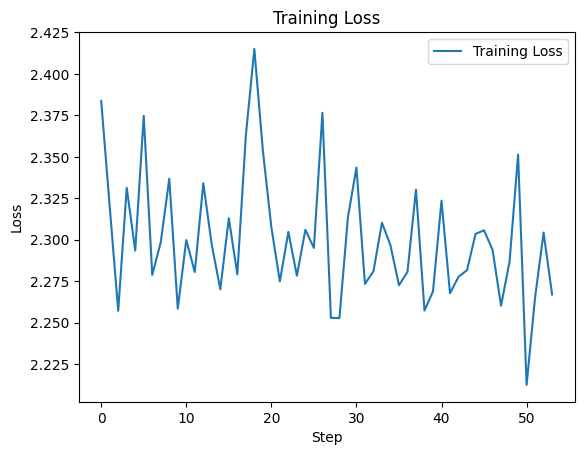

In [86]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()